In [43]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\gekjo\Downloads\putunitya_file\raw\Challenge_3.csv")
print(df.head())

  treatment_group  customer_id  transaction
0         control      1001102            0
1         control      1003032            0
2         control      1003264            0
3         control      1003659            0
4         control      1005674            0


In [44]:
activation_summary = df.groupby("treatment_group").agg(
    users=("customer_id", "count"),
    activated=("transaction", "sum")
).reset_index()

activation_summary["activation_rate"] = (
    activation_summary["activated"] / activation_summary["users"] * 100
)

activation_summary

,treatment_group,users,activated,activation_rate
0,control,1250,52,4.16
1,treatment 1,1250,156,12.48
2,treatment 2,1250,208,16.64
3,treatment 3,1250,288,23.04


In [45]:
contingency = []
for _, row in activation_summary.iterrows():
    activated = row["activated"]
    not_activated = row["users"] - row["activated"]
    contingency.append([activated, not_activated])

chi2, p_omni, dof, expected = chi2_contingency(contingency)

print("\n=== Omnibus Chi-square Test ===")
print(f"Chi2 statistic : {chi2:.4f}")
print(f"P-value        : {p_omni:.6f}")


=== Omnibus Chi-square Test ===
Chi2 statistic : 194.0494
P-value        : 0.000000


In [33]:
success = activation_summary["activated"].values
total = activation_summary["users"].values
groups = activation_summary["treatment_group"].values

print("\n=== Pairwise Proportion Z-tests ===")
for i in range(len(groups)):
    for j in range(i + 1, len(groups)):
        sub_success = [success[i], success[j]]
        sub_total = [total[i], total[j]]

        z_stat, p_val = proportions_ztest(sub_success, sub_total)
        print(f"{groups[i]} vs {groups[j]} -> z = {z_stat:.2f}, p = {p_val:.4f}")


=== Pairwise Proportion Z-tests ===
control vs treatment 1 -> z = -7.53, p = 0.0000
control vs treatment 2 -> z = -10.22, p = 0.0000
control vs treatment 3 -> z = -13.77, p = 0.0000
treatment 1 vs treatment 2 -> z = -2.95, p = 0.0032
treatment 1 vs treatment 3 -> z = -6.91, p = 0.0000
treatment 2 vs treatment 3 -> z = -4.01, p = 0.0001


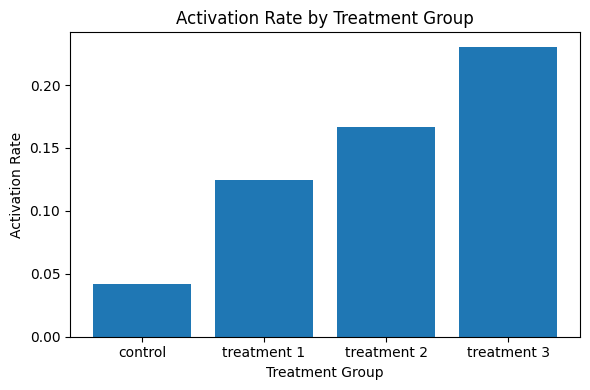

In [34]:
plt.figure(figsize=(6, 4))
plt.bar(
    activation_summary["treatment_group"],
    activation_summary["activation_rate"]
)
plt.title("Activation Rate by Treatment Group")
plt.xlabel("Treatment Group")
plt.ylabel("Activation Rate")
plt.tight_layout()
plt.show()